# Data Exploration of unvectorized data       
### checking temporal relationship of Id with other columns

In [35]:
import pandas as pd
# Loading Data in Pandas Data Frames
trainDF=pd.read_csv('train.csv',index_col=0)
testDF=pd.read_csv('test.csv',index_col=0)
trainDF.location=trainDF.location.apply(lambda x: int(x.split(' ')[1]))
testDF.location=testDF.location.apply(lambda x: int(x.split(' ')[1]))
trainDF.head()

,location,fault_severity
id,,
14121,118,1
9320,91,0
14394,152,1
8218,931,1
14804,120,0


In [36]:
#merge test and train
data=pd.concat([trainDF,testDF],axis=0)
data.tail()

,fault_severity,location
id,,
14806,NaN,1073
1825,NaN,11
2374,NaN,917
7277,NaN,208
9886,NaN,438


In [37]:
# Loading other files
eventTypeDF=pd.read_csv('event_type.csv',index_col=0)
eventTypeDF.event_type=eventTypeDF.event_type.apply(lambda x: int(x.split(' ')[1]))
logFeatureDF=pd.read_csv('log_feature.csv',index_col=0)
logFeatureDF.log_feature=logFeatureDF.log_feature.apply(lambda x: int(x.split(' ')[1]))
resourceTypeDF=pd.read_csv('resource_type.csv',index_col=0)
resourceTypeDF.resource_type=resourceTypeDF.resource_type.apply(lambda x: int(x.split(' ')[1]))
severityTypeDF=pd.read_csv('severity_type.csv',index_col=0)
severityTypeDF.severity_type=severityTypeDF.severity_type.apply(lambda x: int(x.split(' ')[1]))

In [38]:
# Joining Data
data=data.join(eventTypeDF).join(logFeatureDF).join(resourceTypeDF).join(severityTypeDF)
data.head()

,fault_severity,location,event_type,log_feature,volume,resource_type,severity_type
id,,,,,,,
1,1,601,11,68,2,8,1
1,1,601,11,68,2,6,1
1,1,601,11,345,2,8,1
1,1,601,11,345,2,6,1
1,1,601,11,179,1,8,1


In [40]:
pd.crosstab(data.event_type,data.severity_type)

severity_type,1,2,3,4,5
event_type,,,,,
1,0,20,0,0,0
2,209,0,0,0,0
3,148,0,0,0,0
4,3,0,0,0,0
5,384,0,0,0,0
6,303,10,0,0,0
7,265,18,0,0,0
8,150,0,0,0,0
9,163,0,0,0,0


In [5]:
data.to_csv('data.csv',sep='\t')

In [6]:
import numpy as np
data['volumeTransformed']=data.volume.apply(np.log)


In [7]:
train=data[data.fault_severity.notnull()]
test=data[data.fault_severity.isnull()]

In [8]:
train.corr()
#correlation Matrix showing some High degree of correlation between some columns

,fault_severity,location,event_type,log_feature,volume,resource_type,severity_type,volumeTransformed
fault_severity,1.000000,0.270390,-0.262184,-0.208400,-0.027196,0.285475,-0.325157,-0.015721
location,0.270390,1.000000,-0.399109,-0.280521,0.016999,0.451229,-0.365441,0.059514
event_type,-0.262184,-0.399109,1.000000,0.494708,0.061929,-0.614615,0.364120,0.102755
log_feature,-0.208400,-0.280521,0.494708,1.000000,-0.006759,-0.464366,0.303330,0.010221
volume,-0.027196,0.016999,0.061929,-0.006759,1.000000,-0.045263,0.040748,0.684538
resource_type,0.285475,0.451229,-0.614615,-0.464366,-0.045263,1.000000,-0.340374,-0.060650
severity_type,-0.325157,-0.365441,0.364120,0.303330,0.040748,-0.340374,1.000000,0.087999
volumeTransformed,-0.015721,0.059514,0.102755,0.010221,0.684538,-0.060650,0.087999,1.000000


### Trying to find temporal relationship with Id

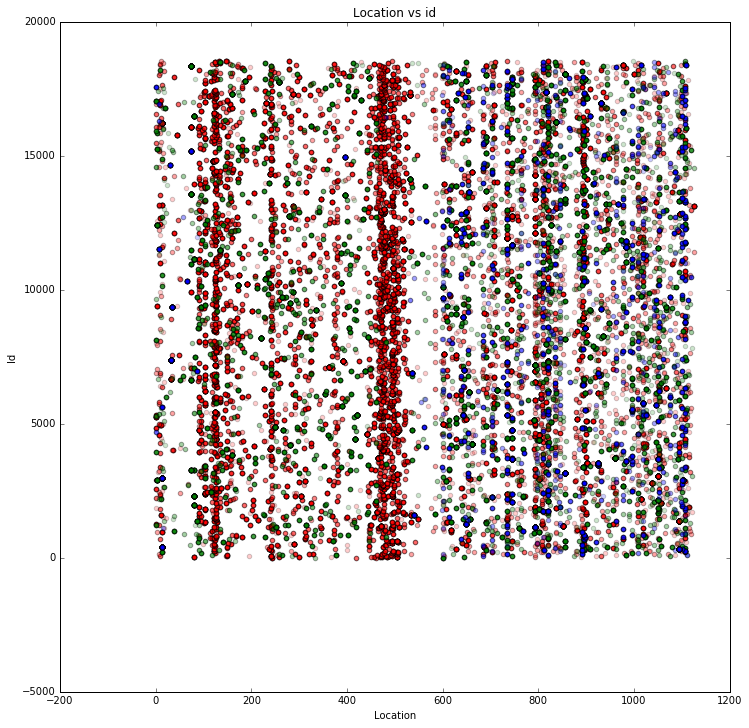

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(12,12))
for color, label in zip('rgb', [0, 1, 2]):
    ax.scatter(train[train.fault_severity==label].location,train[train.fault_severity==label].index,alpha=0.2,c=color,label=str(label))

plt.title('Location vs id')
plt.xlabel('Location')
plt.ylabel('Id')

Here Red represent class 0, Green represent class 1 and Blue represents class 2     
We can see that there is some cluster of red data points at some locations around 500 we can confirm that from KDE in other data exploration notebook

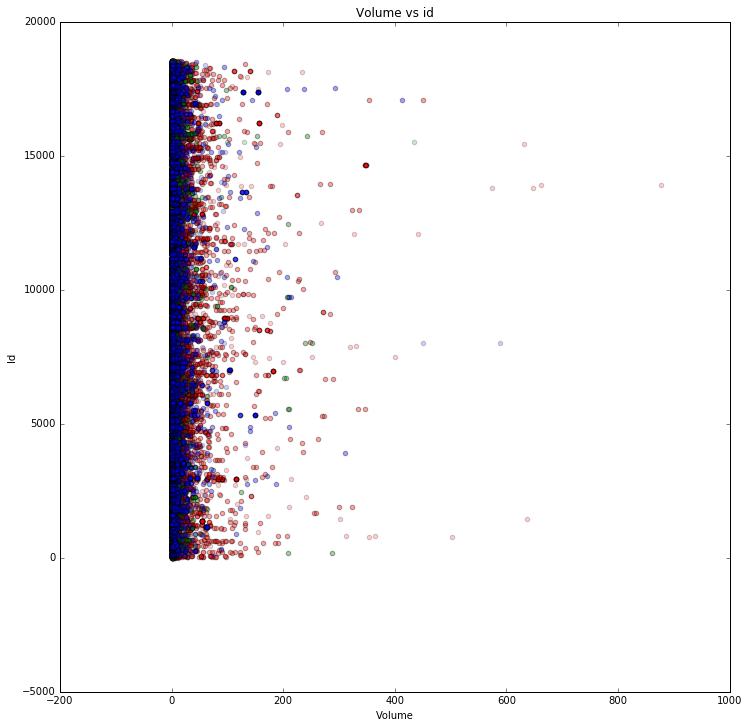

In [10]:
#Plotting volume before Transfromation
fig, ax = plt.subplots(figsize=(12,12))
for color, label in zip('rgb', [0, 1, 2]):
    ax.scatter(train[train.fault_severity==label].volume,train[train.fault_severity==label].index,alpha=0.2,c=color,label=str(label))

plt.title('Volume vs id')
plt.xlabel('Volume')
plt.ylabel('Id')

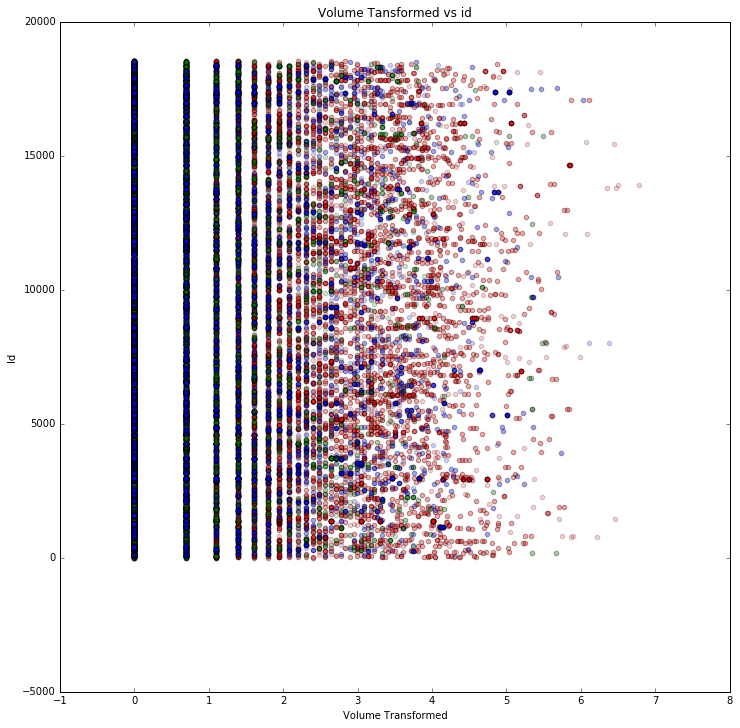

In [11]:
#plotting volume after transformation
fig, ax = plt.subplots(figsize=(12,12))
for color, label in zip('rgb', [0, 1, 2]):
    ax.scatter(train[train.fault_severity==label].volumeTransformed,train[train.fault_severity==label].index,alpha=0.2,c=color,label=str(label))
#     plt.scatter(trainDF.location,trainDF.index, alpha=0.5, c=color, label=str(label))

plt.title('Volume Tansformed vs id')
plt.xlabel('Volume Transformed')
plt.ylabel('Id')

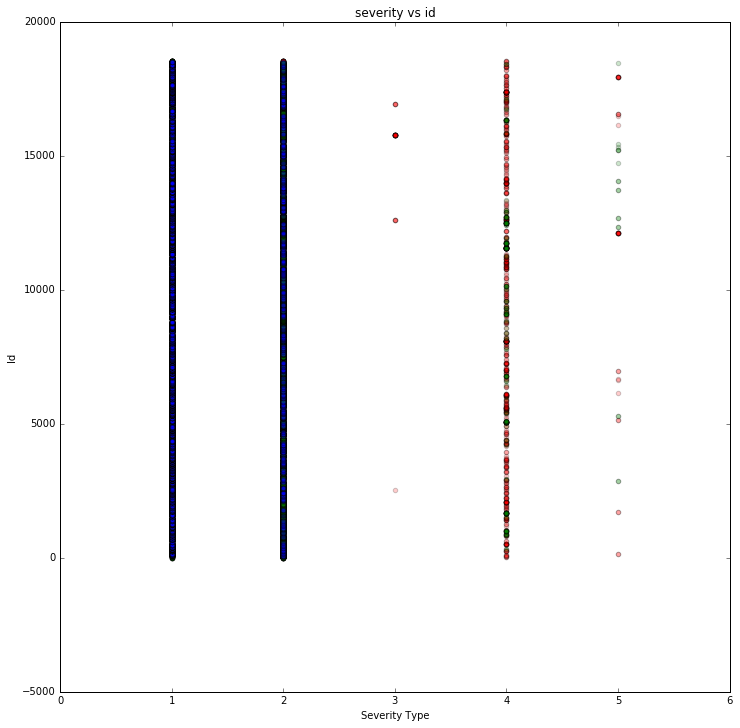

In [12]:
fig, ax = plt.subplots(figsize=(12,12))
for color, label in zip('rgb', [0, 1, 2]):
    ax.scatter(train[train.fault_severity==label].severity_type,train[train.fault_severity==label].index,alpha=0.2,c=color,label=str(label))
#     plt.scatter(trainDF.location,trainDF.index, alpha=0.5, c=color, label=str(label))
plt.title('severity vs id')
plt.xlabel('Severity Type')
plt.ylabel('Id')

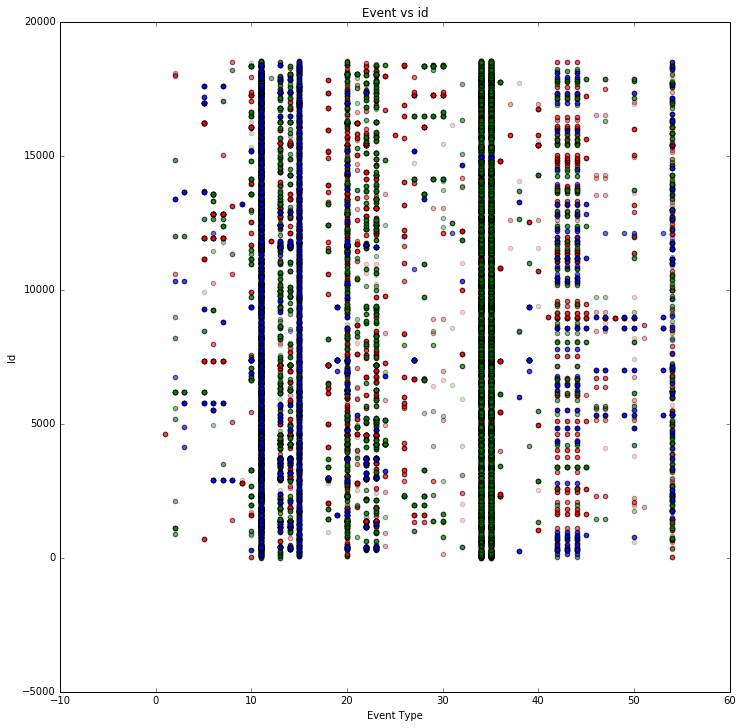

In [13]:
fig, ax = plt.subplots(figsize=(12,12))
for color, label in zip('rgb', [0, 1, 2]):
    ax.scatter(train[train.fault_severity==label].event_type,train[train.fault_severity==label].index,alpha=0.2,c=color,label=str(label))
#     plt.scatter(trainDF.location,trainDF.index, alpha=0.5, c=color, label=str(label))
plt.title('Event vs id')
plt.xlabel('Event Type')
plt.ylabel('Id')

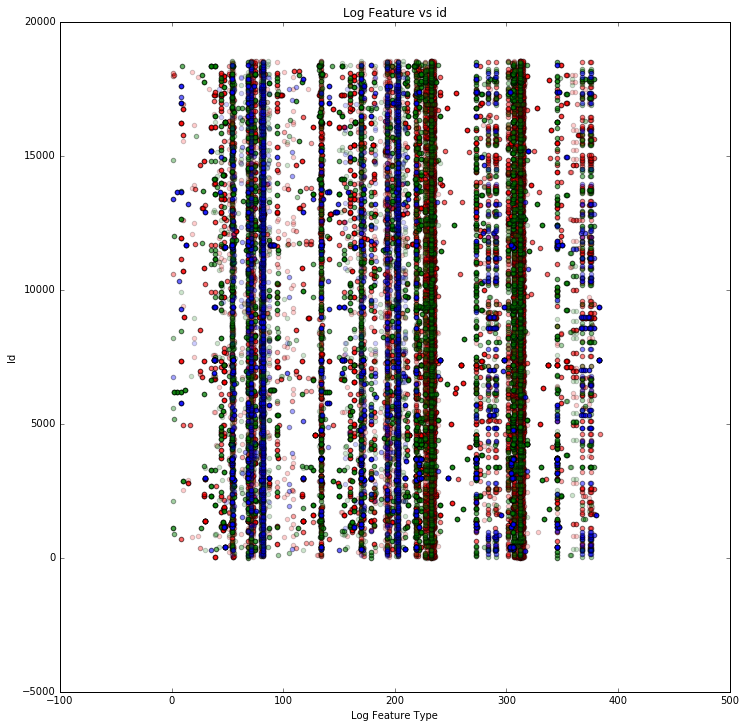

In [14]:
fig, ax = plt.subplots(figsize=(12,12))
for color, label in zip('rgb', [0, 1, 2]):
    ax.scatter(train[train.fault_severity==label].log_feature,train[train.fault_severity==label].index,alpha=0.2,c=color,label=str(label))
#     plt.scatter(trainDF.location,trainDF.index, alpha=0.5, c=color, label=str(label))
plt.title('Log Feature vs id')
plt.xlabel('Log Feature Type')
plt.ylabel('Id')

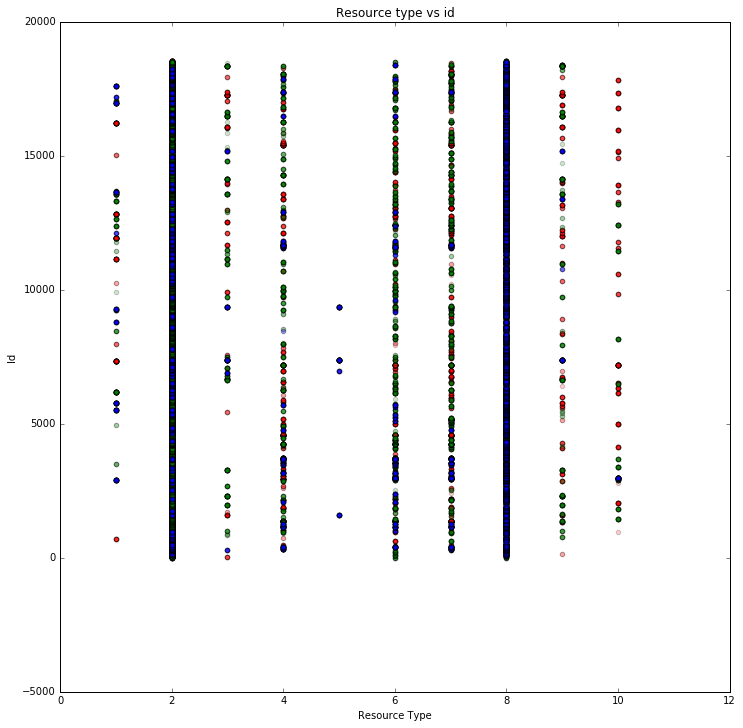

In [15]:
fig, ax = plt.subplots(figsize=(12,12))
for color, label in zip('rgb', [0, 1, 2]):
    ax.scatter(train[train.fault_severity==label].resource_type,train[train.fault_severity==label].index,alpha=0.2,c=color,label=str(label))
#     plt.scatter(trainDF.location,trainDF.index, alpha=0.5, c=color, label=str(label))
plt.title('Resource type vs id')
plt.xlabel('Resource Type')
plt.ylabel('Id')

In [23]:
X=train.drop(['volume','fault_severity'],axis=1)
X=X.as_matrix()

In [24]:
X_test=test.drop(['volume','fault_severity'],axis=1)
X_test=X_test.as_matrix()

In [27]:
Y=train.fault_severity

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn import metrics
clf=LogisticRegression(C=1e3, penalty='l2') #ll 0.608 c=1e3

clf.fit(X,Y)

#Performing CV with k=10
predicted = cross_validation.cross_val_predict(clf, X, Y, cv=10)

#print metrics
print "accuracy score: ", metrics.accuracy_score(Y, predicted)


accuracy score:  0.586183476447


In [34]:
print "classification_report: \n ", metrics.classification_report(Y, predicted)

classification_report: 
               precision    recall  f1-score   support

        0.0       0.64      0.85      0.73     36597
        1.0       0.40      0.26      0.31     16524
        2.0       0.41      0.10      0.17      8718

avg / total       0.54      0.59      0.54     61839



In [31]:
print "log loss :", metrics.log_loss(Y,clf.predict_proba(X))

log loss : 0.820802666835


In [33]:
print "confusion_matrix:\n ", metrics.confusion_matrix(Y,predicted)

confusion_matrix:
  [[31067  4676   854]
 [11815  4268   441]
 [ 5998  1806   914]]
